<a href="https://colab.research.google.com/github/rubengamarro/Kobe/blob/main/kobe(loc_x%2Cloc_y)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

In [ ]:
# Cargamos una base de datos preexistente
kobedata = pd.read_csv('https://raw.githubusercontent.com/raguiso/kobebryant/main/data.csv', sep =',')

# Primero, nos aseguramos de que el valor de la season esté en formato numérico
kobedata['season_numeric'] = kobedata['season'].apply(lambda x: int(x.split('-')[0]))

# Ahora filtramos las temporadas deseadas
kobedata_filtered = kobedata[(kobedata['season_numeric'] >= 1998) & (kobedata['season_numeric'] <= 2012)]
#Eliminamos las columnas (categorías e indicadores) que no vamos a analizar
columns_to_drop_estudio = ['action_type', 'game_event_id', 'game_id', 'season_numeric', 'lat','lon', 'team_id', 'minutes_remaining','season','shot_zone_area','period','combined_shot_type',
                   'game_date', 'matchup', 'opponent', 'team_name', 'playoffs', 'seconds_remaining','shot_zone_range','shot_type','shot_distance','shot_id','shot_zone_basic']
kobedata_estudio = kobedata_filtered.drop(columns=columns_to_drop_estudio)


# Eliminar filas donde haya NaN
kobedata_estudio.dropna(inplace=True)

kobedata_estudio





,loc_x,loc_y,shot_made_flag
1,-157,0,0.0
2,-101,135,1.0
3,138,175,0.0
4,0,0,1.0
5,-145,-11,0.0
...,...,...,...
30691,0,0,0.0
30692,1,48,0.0
30694,-134,166,1.0
30695,31,267,0.0


In [ ]:
print(min(kobedata_estudio['loc_x']))
print(max(kobedata_estudio['loc_x']))
print(min(kobedata_estudio['loc_y']))
print(max(kobedata_estudio['loc_y']))

-248
248
-44
791


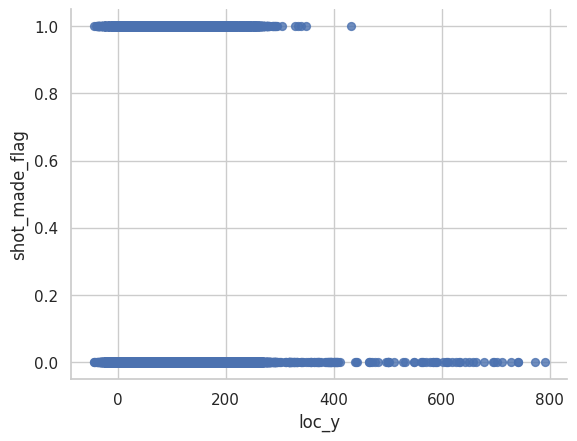

In [ ]:
# @title loc_y vs shot_made_flag

from matplotlib import pyplot as plt
kobedata_estudio.plot(kind='scatter', x='loc_y', y='shot_made_flag', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

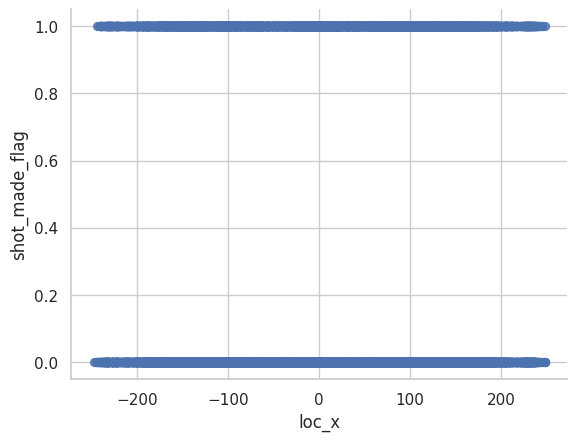

In [ ]:
kobedata_estudio.plot(kind='scatter', x='loc_x', y='shot_made_flag', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='shot_made_flag', ylabel='index'>

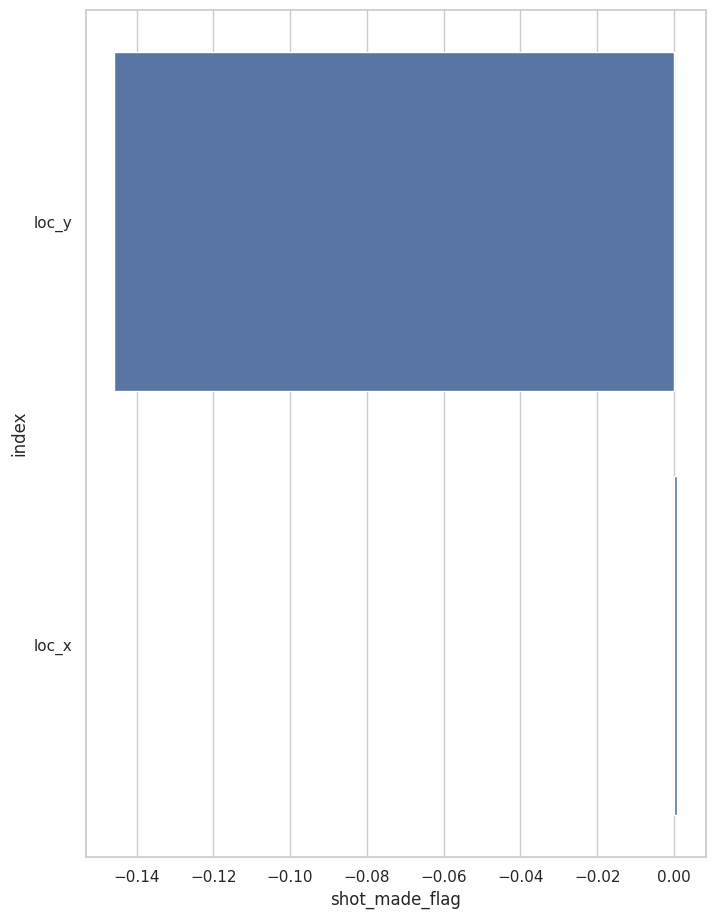

In [ ]:
plt.figure(figsize=(8,11))
corr = kobedata_estudio.corr()['shot_made_flag'].sort_values(ascending=True).reset_index()[0:2]
sns.barplot(data=corr, x='shot_made_flag',y='index')

In [ ]:
X = kobedata_estudio.drop('shot_made_flag', axis=1)
y = kobedata_estudio['shot_made_flag'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=444)

In [ ]:
print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)


X_train:(18336, 2)
X_test:(4584, 2)

y_train:(18336,)
y_test:(4584,)


In [ ]:
from sklearn import metrics
pred_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred_test))

0.5785340314136126


In [ ]:
print("clasifica bien el", metrics.accuracy_score(y_test, pred_test)*100, "%  de los datos")

clasifica bien el 57.85340314136126 %  de los datos


In [ ]:
print("Coeficientes:", list(zip(X.columns, model.coef_.flatten(), )))

Coeficientes: [('loc_x', -0.0001332247408773592), ('loc_y', -0.003441723149576216)]


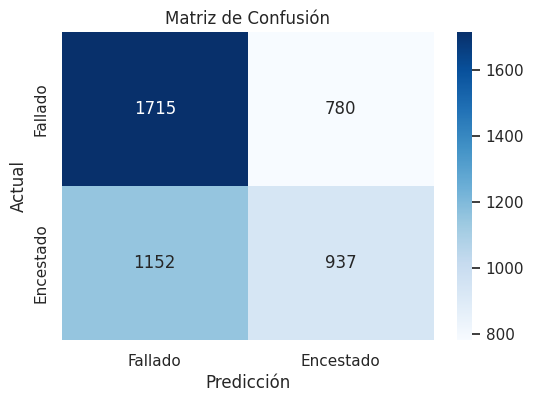

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fallado', 'Encestado'], yticklabels=['Fallado', 'Encestado'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
X = kobedata_estudio.drop('shot_made_flag', axis=1)
y = kobedata_estudio['shot_made_flag'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=444)

import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.677916
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                18336
Model:                          Logit   Df Residuals:                    18333
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                 0.01539
Time:                        07:23:42   Log-Likelihood:                -12430.
converged:                       True   LL-Null:                       -12625.
Covariance Type:            nonrobust   LLR p-value:                 4.126e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1120      0.022      5.202      0.000       0.070       0.154
loc_x         -0.0001      0.

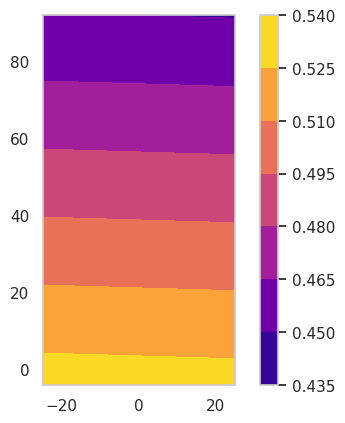

In [ ]:
X, Y = np.meshgrid(np.linspace(-25, 25, 100),
                   np.linspace(-4, 92, 100))

def f(d): return 1/ (1 + np.exp(-0.3790 + 0.0437*d) )

Z = 1/ (1 + np.exp(-0.1120 + 0.0001*X + 0.0034*Y) )

# Contour relleno
contour = plt.contourf(X, Y, Z, cmap='plasma')
plt.gca().set_aspect(1)
cbar = plt.colorbar(contour)

SOLUCION: USAR LA DISTANCIA A LA CANCHA

In [ ]:
# Cargamos una base de datos preexistente
kobedata = pd.read_csv('https://raw.githubusercontent.com/raguiso/kobebryant/main/data.csv', sep =',')

# Primero, nos aseguramos de que el valor de la season esté en formato numérico
kobedata['season_numeric'] = kobedata['season'].apply(lambda x: int(x.split('-')[0]))

# Ahora filtramos las temporadas deseadas
kobedata_filtered = kobedata[(kobedata['season_numeric'] >= 1998) & (kobedata['season_numeric'] <= 2012)]
#Eliminamos las columnas (categorías e indicadores) que no vamos a analizar
columns_to_drop_estudio = ['action_type', 'game_event_id', 'game_id', 'season_numeric', 'loc_x', 'loc_y', 'lat','lon', 'team_id', 'minutes_remaining','season','shot_zone_area','period', 'combined_shot_type',
                   'game_date', 'matchup', 'opponent', 'team_name', 'playoffs', 'seconds_remaining','shot_zone_range','shot_type','shot_id','shot_zone_basic']
kobedata_estudio = kobedata_filtered.drop(columns=columns_to_drop_estudio)


# Eliminar filas donde haya NaN
kobedata_estudio.dropna(inplace=True)

kobedata_estudio

type(kobedata_estudio['shot_distance'][1])


numpy.int64

In [ ]:
# Cargamos una base de datos preexistente
kobedata = pd.read_csv('https://raw.githubusercontent.com/raguiso/kobebryant/main/data.csv', sep =',')

# Primero, nos aseguramos de que el valor de la season esté en formato numérico
kobedata['season_numeric'] = kobedata['season'].apply(lambda x: int(x.split('-')[0]))

# Ahora filtramos las temporadas deseadas
kobedata_filtered = kobedata[(kobedata['season_numeric'] >= 1998) & (kobedata['season_numeric'] <= 2012)]
#Eliminamos las columnas (categorías e indicadores) que no vamos a analizar
columns_to_drop_estudio = ['action_type', 'game_event_id', 'game_id', 'season_numeric', 'combined_shot_type', 'lat','lon', 'team_id', 'minutes_remaining','season','shot_zone_area','period',
                   'game_date', 'matchup', 'opponent', 'team_name', 'playoffs', 'seconds_remaining','shot_zone_range','shot_type','shot_id','shot_zone_basic', 'loc_x', 'loc_y']
kobedata_estudio = kobedata_filtered.drop(columns=columns_to_drop_estudio)


# Eliminar filas donde haya NaN
kobedata_estudio.dropna(inplace=True)

kobedata_estudio


,shot_distance,shot_made_flag
1,15,0.0
2,16,1.0
3,22,0.0
4,0,1.0
5,14,0.0
...,...,...
30691,0,0.0
30692,4,0.0
30694,21,1.0
30695,26,0.0


In [ ]:
max(kobedata_estudio['shot_distance'])

79

In [ ]:
X = kobedata_estudio.drop('shot_made_flag', axis=1)
y = kobedata_estudio['shot_made_flag'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=444)

In [ ]:
print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

X_train:(18336, 1)
X_test:(4584, 1)

y_train:(18336,)
y_test:(4584,)


In [ ]:
from sklearn import metrics
pred_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred_test))

0.5909685863874345


In [ ]:
print("clasifica bien el", metrics.accuracy_score(y_test, pred_test)*100, "%  de los datos")

clasifica bien el 59.096858638743456 %  de los datos


In [ ]:
X = kobedata_estudio.drop('shot_made_flag', axis=1)
y = kobedata_estudio['shot_made_flag'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=444)

import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.669057
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                18336
Model:                          Logit   Df Residuals:                    18334
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                 0.02826
Time:                        07:31:39   Log-Likelihood:                -12268.
converged:                       True   LL-Null:                       -12625.
Covariance Type:            nonrobust   LLR p-value:                3.550e-157
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3790      0.026     14.361      0.000       0.327       0.431
shot_distance    -0.

In [ ]:
1/(1+ np.exp(-0.3790))

0.5936318924705234

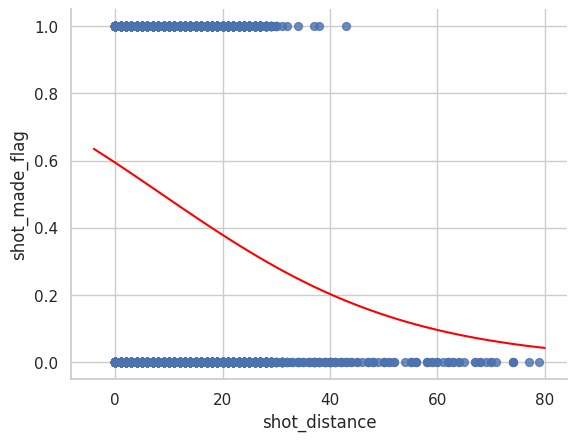

In [ ]:
from matplotlib import pyplot as plt
kobedata_estudio.plot(kind='scatter', x='shot_distance', y='shot_made_flag', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

x = np.linspace(-4,80)
def f(z): return 1 / (1 + np.exp(-0.3790+0.0437*z))
plt.plot(x, f(x), color='red')

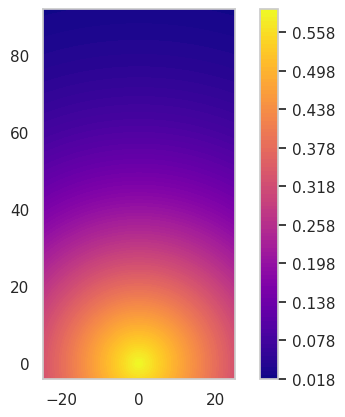

In [ ]:
# Datos
X, Y = np.meshgrid(np.linspace(-25, 25, 100),
                   np.linspace(-4, 92, 100))

def f(d): return 1/ (1 + np.exp(-0.3790 + 0.0437*d) )

Z = f(np.sqrt(X**2 + Y**2))

# Contour relleno
contour = plt.contourf(X, Y, Z, cmap='plasma', levels=100)
plt.gca().set_aspect(1)
cbar = plt.colorbar(contour)

In [ ]:
1/(1 + np.exp(-0.3790+0.0437*92))

0.025545914504216012

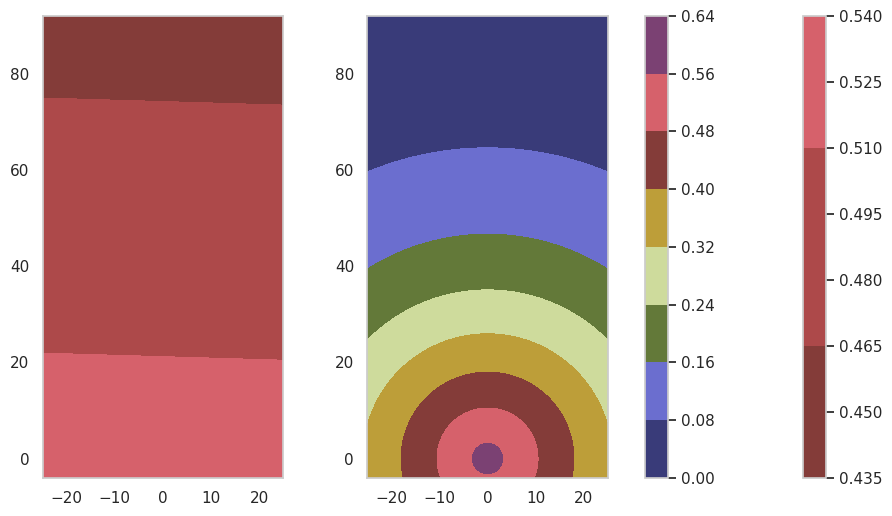

In [ ]:
X, Y = np.meshgrid(np.linspace(-25, 25, 100),
                   np.linspace(-4, 92, 100))

Z1 = 1/ (1 + np.exp(-0.1120 + 0.0001*X + 0.0034*Y) )

def f(d): return 1/ (1 + np.exp(-0.3790 + 0.0437*d) )

Z2 = f(np.sqrt(X**2 + Y**2))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Crear el primer mapa de calor
contour1 = ax1.contourf(X, Y, Z1, cmap='tab20b', vmin=0.05, vmax=0.7)
cbar = fig.colorbar(contour1, ax=[ax1,ax2], orientation='vertical')

# Crear el segundo mapa de calor
contour2 = ax2.contourf(X, Y, Z2, cmap='tab20b', vmin=0.05, vmax=0.7)

# Ajustar la relación de aspecto si es necesario
ax1.set_aspect(1)
ax2.set_aspect(1)

# Agregar una única barra de colores que cubra ambos gráficos
# Debemos especificar el rango de valores que debe cubrir la barra de colores
cbar = fig.colorbar(contour2, ax=[ax1,ax2], orientation='vertical')

In [ ]:
pip install palettable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
from palettable.cmocean.diverging import Balance_20
from palettable.cmocean.sequential import Thermal_20
from palettable.mycarta import Cube1_20

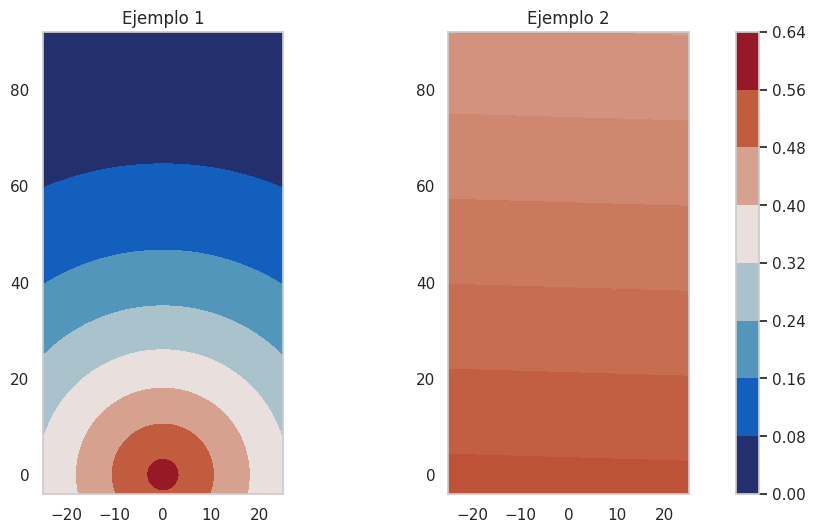

In [ ]:
X, Y = np.meshgrid(np.linspace(-25, 25, 100),
                   np.linspace(-4, 92, 100))

def f(d): return 1/ (1 + np.exp(-0.3790 + 0.0437*d) )

Z1 = f(np.sqrt(X**2 + Y**2))

Z2 = 1/ (1 + np.exp(-0.1120 + 0.0001*X + 0.0034*Y) )


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Crear el primer mapa de calor
contour1 = ax1.contourf(X, Y, Z1,cmap=Balance_20.mpl_colormap,vmin=0, vmax=0.7)


# Crear el segundo mapa de calor
contour2 = ax2.contourf(X, Y, Z2, cmap=Balance_20.mpl_colormap, vmin=0, vmax=0.7)

# Ajustar la relación de aspecto si es necesario
ax1.set_aspect(1)
ax2.set_aspect(1)

ax1.set_title("Ejemplo 1")
ax2.set_title("Ejemplo 2")



# Agregar una única barra de colores que cubra ambos gráficos
# Debemos especificar el rango de valores que debe cubrir la barra de colores
cbar = fig.colorbar(contour1, ax=[ax1,ax2], orientation='vertical')